<a href="https://colab.research.google.com/github/sarahklock/SDCB/blob/main/Implementacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

# Imports

In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/drive')
DRIVE_PATH='/drive/Shareddrives/Tcc2021AS'

Mounted at /drive


In [ ]:
!rm -Rf ./dvTools
!cp -r "$DRIVE_PATH/code/dvTools_pasta" ./dvTools
!cp "$DRIVE_PATH/code/dvTools_pasta/grafo2.json" ./test_graph.json
!cp -r '/drive/Shareddrives/Tcc2021AS/code/4 - testes_dvTools/lib' ./dvTools_mod

In [ ]:
# Importing libs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

import json
import time
import random
import math

import dvTools.dvTools
from dvTools.dvTools.Grafo import Grafo
from dvTools.dvTools.Caminhos import Caminhos
import dvTools_mod

In [ ]:
# Typing
from typing import List, Optional, Tuple, Dict

# A 2d point has 2 components, x and y
PVector = Tuple[int, int]

FrameType = Tuple[Tuple[int, int], Tuple[int, int]]
# A frame will take the x coordinates on its first tuple and the the y
# coordinates on its second tuple

g = Grafo('test_graph.json')
# The first value of each tuple will take the minium value of the coordinate
# The second value of each tuple will take the maximum value of the coordinate
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.array(g.coords_point()))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Calculating the weight matrix according to the cartesian distances

A função seguinte aceita apenas pontos inteiros, ou seja, o indice dos pontos cadastrados no grafo. Existem três possibilidades para se inserir nos parâmetros:


*   **Apenas o grafo**: retorna a matriz inteira, comparando todos os pontos com todos os pontos 
*   **O grafo e um ponto**: retorna uma lista com as distâncias de todos os pontos em relação ao ponto especifico inserido.
*   **O grafo e dois pontos**: retorna apenas a distância entre esses dois pontos específicos.
*   **O grafo e centroid=True**: retorna a matriz com os ultimos integrantes sendo os centroides. Se quero saber as distancias ao centroide de grupo x, vou até a posição [-(x+1)] ou [-x-1]. Soma-se 1 para permitir que haja o grupo 0.
 *Exemplo*: distance(g, centroid=True)[-(0+1)]








In [ ]:
def distance(grafo: Grafo,
             ponto1: Optional[int]=None,
             ponto2: Optional[int]=None,
             centroid: bool=False,
             verbose: bool=True) -> List:
  """
  :param grafo: The graph where the points are
  :param ponto1: The point where the distance will be taken from, if None, all points are considered
  :param ponto2: The point where the distance will be taken to, if None, all points are considered
  :param centroid: True if the centroids will be considered as point, in this case it is the last index
  :param verbose: True if the function should be verbose
  :return: list of computed distances between points
  """

  coords = grafo.coords_point()
  
  # If centroid == True, the last elements fo the matriz will be the centroids,
    # for it to be possible to calculate the distance between the points and the
    # centroids. They can be accessed in a way that, if I want to know the
    # distances of all points to the x centroid, I go to the position [-(x+1)]
    # or [-x-1]. We add 1 to make it possible to exists the 0 group.
      # Example: distance(g, centroid=True)[-(0+1)] 

  # Se centroid == True, os ultimos integrantes da matriz serao os centroides,
    # para ser possivel calcular a distancia dos pontos para os centroides. Eles
    # poderão ser acessados de modo que, se quero saber as distancias ao
    # centroide de grupo x, vou até a posição [-(x+1)] ou [-x-1]. Soma-se 1 para
    # permitir que haja o grupo 0.
      # Exemplo: distance(g, centroid=True)[-(0+1)]

  if centroid: 
    for i in kmeans.cluster_centers_:
      coords.append(None)
    j = 1
    for i in kmeans.cluster_centers_:
      coords[-j] = tuple(i)
      j += 1
     
  
  if ponto2 == None:
    matriz = []

    if ponto1 == None: 
      # If there werent inserted any points, the fuction returns the whole matrix.
      if verbose:
        print("Calculando as distancias de todos os pontos entre si...")

      i = 0
      for ponto1 in coords:
        matriz.append([])
        
        for ponto2 in coords:
          distancia = ((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2)**(1/2)
          
          matriz[i].append(distancia)
        i += 1

      return matriz
    
    else:
      # If there was inserted one point, the fuction returns a list with the distance between this pont and all the others.
      if verbose:
        print(f"Calculando as distancias de todos os pontos ao ponto {ponto1}...")

      
      ponto1 = coords[ponto1]
      
      for ponto2 in coords:
        distancia = ((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2)**(1/2)
        
        matriz.append(distancia)

      return matriz

  else:
    # If there were inserted two points, the fuction returns only the distance between these two points.
    if verbose:
      print(f"Calculando a distancia entre o ponto {ponto1} e o ponto {ponto2}...")

    ponto1 = coords[ponto1]
    ponto2 = coords[ponto2]

    matriz = ((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2)**(1/2)
    return matriz

## Unit tests

### Definitions

In [ ]:
def distance_all_test(source, result, verbose=True):
  import os
  filename = 'file.tmp'
  
  try:
    os.remove(filename)
  except FileNotFoundError:
    pass
  with open(filename, 'x') as f:
    f.write(json.dumps(source))
  
  g = Grafo(filename)
  
  left, right = distance(g, verbose=False), result
  assert left == right

def distance_all_filtered_test(source, point, result):
  import os
  filename = 'file.tmp'
  
  try:
    os.remove(filename)
  except FileNotFoundError:
    pass
  with open(filename, 'x') as f:
    f.write(json.dumps(source))
  
  g = Grafo(filename)
  
  left, right = distance(g, point, verbose=False), result
  assert left == right

def distance_p2p_test(source, point_a, point_b, result):
  import os
  filename = 'file.tmp'
  
  try:
    os.remove(filename)
  except FileNotFoundError:
    pass
  with open(filename, 'x') as f:
    f.write(json.dumps(source))
  
  g = Grafo(filename)
  
  left, right = distance(g, point_a, point_b, verbose=False), result
  assert left == right

# Weights does not matter here
triangle = {'0': {'coords': [0, 0],
                  'edges': [1, 2],
                  'weights': [999, 999]},
            '1': {'coords': [3, 0],
                  'edges': [0, 2],
                  'weights': [999, 999]},
            '2': {'coords': [0, 4],
                  'edges': [0, 1],
                  'weights': [999, 999]}} # The triangle 3, 4, 5

square = {'0': {'coords': [1, 1],
                'edges': [1, 2, 3],
                'weights': [999, 999, 999]},
          '1': {'coords': [-1, 1],
                'edges': [0, 2, 3],
                'weights': [999, 999, 999]},
          '2': {'coords': [-1, -1],
                'edges': [0, 1, 3],
                'weights': [999, 999, 999]},
          '3': {'coords': [1, -1],
                'edges': [0, 1, 2],
                'weights': [999, 999, 999]}}

### Testing

In [ ]:
distance_all_test(triangle, [[0.0, 3.0, 4.0],
                             [3.0, 0.0, 5.0],
                             [4.0, 5.0, 0.0]])
diagonal = 2 * math.sqrt(2)
distance_all_test(square, [[0.0, 2.0, diagonal, 2.0],
                           [2.0, 0.0, 2.0, diagonal],
                           [diagonal, 2.0, 0.0, 2.0],
                           [2.0, diagonal, 2.0, 0.0]])

print('Passed')

Passed


In [ ]:
distance_all_filtered_test(triangle, 0, [0.0, 3.0, 4.0])
distance_all_filtered_test(triangle, 1, [3.0, 0.0, 5.0])
distance_all_filtered_test(square, 0, [0.0, 2.0, diagonal, 2.0])

print('Passed')

Passed


In [ ]:
distance_p2p_test(triangle, 0, 1, 3.0)
distance_p2p_test(triangle, 1, 2, 5.0)
distance_p2p_test(square, 2, 3, 2.0)

print('Passed')

Passed


In [ ]:
distance(g,centroid=True)

Calculando as distancias de todos os pontos entre si...


[[0.0,
  342.78649331617487,
  180.22832740720867,
  332.3079595796646,
  170.60000000000002,
  250.8863089130214,
  413.1407145271451,
  394.2192917653828,
  170.23816323674967,
  294.26854809850136],
 [342.78649331617487,
  0.0,
  377.55869742332777,
  417.6996528607607,
  180.20349608151332,
  238.45670466564783,
  354.77904391325035,
  185.20326670985048,
  355.22688367983767,
  171.3640755817858],
 [180.22832740720867,
  377.55869742332777,
  0.0,
  158.0897529886109,
  211.10720025617317,
  169.50755145420513,
  276.0706069106235,
  337.2429984447416,
  22.411951176895666,
  246.22037364929815],
 [332.3079595796646,
  417.6996528607607,
  158.0897529886109,
  0.0,
  299.1516337912932,
  180.3491059029681,
  159.54739107863847,
  303.2405810573513,
  162.74030095694047,
  249.489732053245],
 [170.60000000000002,
  180.20349608151332,
  211.10720025617317,
  299.1516337912932,
  0.0,
  137.91569888885022,
  309.3866351347453,
  234.15561065240354,
  189.02784333413837,
  140.973679

A função seguinte funciona apenas para coordenadas exatas, para facilitar às contas com os centróides.

In [ ]:
# Função que aceita coordenadas exatas.

def distance_coords(coord1, coord2, grafo=None):
  return ((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)**(1/2)

In [ ]:
distance_coords([1,1],[1,2])

1.0

# Hilbert's space-filling curve's algorithms

## Generate frame

In [ ]:
def gen_frame(point_mesh: np.ndarray) -> FrameType:
  """
  :param point_mesh: An array of PVectors containing the points
  :return: The limits of the frame in a matrix being (x, y) and (min, max)
  """

  min_x, min_y = (np.min(point_mesh[:,0]),
                  np.min(point_mesh[:,1]))

  max_width = np.max((max(point_mesh[:,0]) - min_x,
                   max(point_mesh[:,1]) - min_y))
  return ((min_x, min_x + max_width),
          (min_y, min_y + max_width))

### Unit tests

#### Definitions

In [ ]:
points = [(0, 0), (-1, 5), (-50, 90), (999, 10), (90, 30), (29, 4)]

#### Tests

In [ ]:
assert gen_frame(np.array(points)) == ((-50, 999), (0, 1049))

print('Passed')

Passed


## Getting quadrant

In [ ]:
def get_quadrant(point: PVector,
                 frame: FrameType) -> int:
  """
  :param point: The point coordinates
  :param frame: The frame that contains the point
  :return: An index between 0 and 3, defined by the quadrant of the frame where the point is
  """

  leftX = point[0] <= (frame[0][0] + frame[0][1]) / 2
  bottomY = point[1] <= (frame[1][0] + frame[1][1]) / 2
  
  if leftX and bottomY:
    return 0
  elif leftX and not(bottomY):
    return 1
  elif not(leftX) and not(bottomY):
    return 2
  else:
    return 3

### Unit tests

#### Definitions

In [ ]:
frame = ((-1 , 1), (-1, 1))

#### Tests

In [ ]:
assert get_quadrant((0.1, 0.1), frame) == 2
assert get_quadrant((-0.1, 1), frame) == 1
assert get_quadrant((0.5, -0.5), frame) == 3
assert get_quadrant((-1, -1), frame) == 0

print('Passed')

Passed


## Quadrant filter

In [ ]:
def filter_quadrant(quadrant: int,
                    frame: FrameType) -> FrameType:
  """
  :param quadrant: The index, from 0 to 3, of the quadrant
  :param frame: The frame that contains the quadrants
  :return: The selected quadrant from the frame, excluding the other 3
  """

  mean_x = (frame[0][0] + frame[0][1]) / 2
  mean_y = (frame[1][0] + frame[1][1]) / 2
  if quadrant == 0:
    out = ((frame[0][0], mean_x), (frame[1][0], mean_y))
  elif quadrant == 1:
    out = ((frame[0][0], mean_x), (mean_y, frame[1][1]))
  elif quadrant == 2:
    out = ((mean_x, frame[0][1]), (mean_y, frame[1][1]))
  elif quadrant == 3:
    out = ((mean_x, frame[0][1]), (frame[1][0], mean_y))
  
  return out

### Unit tests

#### Definitions

In [ ]:
frame = ((-1 , 1), (-1, 1))

#### Tests

In [ ]:
assert filter_quadrant(0, frame) == ((-1, 0), (-1, 0))
assert filter_quadrant(1, frame) == ((-1, 0), (0, 1))
assert filter_quadrant(2, frame) == ((0, 1), (0, 1))
assert filter_quadrant(3, frame) == ((0, 1), (-1, 0))

print('Passed')

Passed


## Getting point pos

In [ ]:
def update_rot(cur_rot: int, quadrant: int) -> int:
  """
  :param int cur_rot: The current rotation of the Hilbert curve
  :param int quadrant: The quadrant where the Hilbert curve is
  :return: How many rotations needs to be added to keep degenerating the curve
  :rtype: int
  """

  if cur_rot == quadrant:
    return 1
  if cur_rot == ((quadrant + 1) % 4):
    return -1
  return 0

def hsfc_get_point_pos(point: PVector,
                       order: int,
                       frame: FrameType) -> int:
  """
  :param PVector point: The point whose position in the curve needs to be found
  :param int order: The order of the total pseudo curve
  :param FrameType frame: The frame that contains the pseudo curve
  :return: The position of the closest edge of the pseudo curve from the input point
  :rtype: int
  """

  point_subpos = ((0, 1, 2, 3), # 0°
                  (0, 3, 2, 1), # 90°
                  (2, 3, 0 ,1), # 180°
                  (2, 1, 0, 3)) # 270°

  out, rot = 0, 0
  for it in range(order + 1):
    index = get_quadrant(point, frame)
    frame = filter_quadrant(index, frame)
    out += point_subpos[rot][index] * (4 ** (order - it))
    rot += update_rot(rot, index)
    if rot < 0:
      rot = 4 + rot
    else:
      rot %= 4
  return out

### Unit tests

#### Definitions

In [ ]:
HILBERT_SFC_0 = ( (0, 0), (0, 1), (1, 1), (1, 0) )
def hilbert_sfc_gen_curve(order):
  if (order < 0):
    raise ValueError('Pseudo Hilbert space filling curve must be in positive order')
  global HILBERT_SFC_0

  output = np.array(HILBERT_SFC_0)
  
  for cur_order in range(1, order + 1):
    offset = 2 ** cur_order

    bottom_left = output[:, [1, 0]].tolist()
    top_left = (output + (0, offset)).tolist()
    top_right = (output + offset).tolist()
    bottom_right = (((offset * 2) - 1, offset - 1) - output[:, [1, 0]]).tolist()

    output = np.array(bottom_left + top_left + top_right + bottom_right)
  
  return output

In [ ]:
def hsfc_get_point_pos_debug(point: PVector,
                             order: int,
                             frame: FrameType) -> int:
  or_frame = frame
  
  point_subpos = ((0, 1, 2, 3), # 0°
                  (0, 3, 2, 1), # 90°
                  (2, 3, 0 ,1), # 180°
                  (2, 1, 0, 3)) # 270°

  out, rot = 0, 0
#  plt.plot((frame[0][0], frame[0][0], frame[0][1], frame[0][1]),
#            (frame[1][0], frame[1][1], frame[1][1], frame[1][0]))
  hsfc = hilbert_sfc_gen_curve(order).astype(float)
  mult = ((frame[0][1] - frame[0][0]) / (2 ** (order + 1)))
  hsfc *= mult
  hsfc += [frame[0][0] + mult / 2, frame[1][0] + mult / 2]
  for it in range(order + 1):
    index = get_quadrant(point, frame)
    frame = filter_quadrant(index, frame)

    out += point_subpos[rot][index] * (4 ** (order - it))
    rot += update_rot(rot, index)
    ax = plt.figure(figsize=(6,6))
    plt.scatter(point[0], point[1])
    plt.plot(hsfc[:,0],
             hsfc[:,1])
    plt.scatter(hsfc[:,0],
                hsfc[:,1],
                c='k',
                s=10)
    plt.scatter(hsfc[:out,0],
                hsfc[:out,1],
                c='r',
                s=10,
                label=f'Pontos já percorridos: {out}')
    plt.plot((frame[0][0], frame[0][0], frame[0][1], frame[0][1], frame[0][0]),
             (frame[1][0], frame[1][1], frame[1][1], frame[1][0], frame[1][0]))
    plt.scatter(point[0], point[1])
    plt.plot((or_frame[0][0], or_frame[0][0], or_frame[0][1], or_frame[0][1]),
             (or_frame[1][0], or_frame[1][1], or_frame[1][1], or_frame[1][0]))

    ax.legend()
    plt.show()
  
  ax = plt.figure(figsize=(6,6))
  plt.scatter(point[0], point[1],)
  plt.plot(hsfc[:,0],
           hsfc[:,1])
  plt.scatter(hsfc[:out,0],
              hsfc[:out,1],
              c='r',
              s=10)
  plt.scatter(hsfc[out,0],
              hsfc[out,1],
              c='g',
              label=f'Posição final: {out}')
  plt.plot((or_frame[0][0], or_frame[0][0], or_frame[0][1], or_frame[0][1]),
           (or_frame[1][0], or_frame[1][1], or_frame[1][1], or_frame[1][0]))
  ax.legend()
  return out

In [ ]:
points = np.array([(0, 0), (-5, 9), (10, 6), (7, 7), (3, 2)])
frame = gen_frame(points)
order = 2

#### Tests

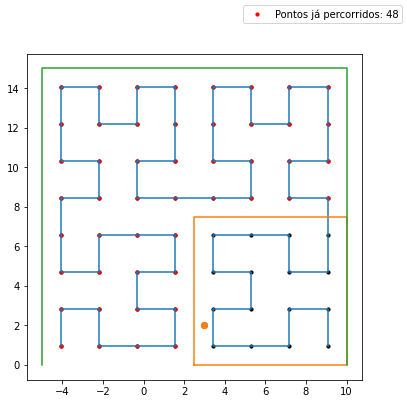

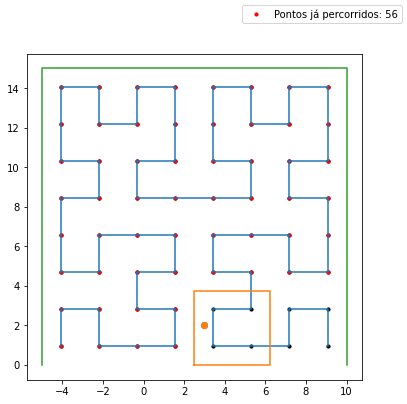

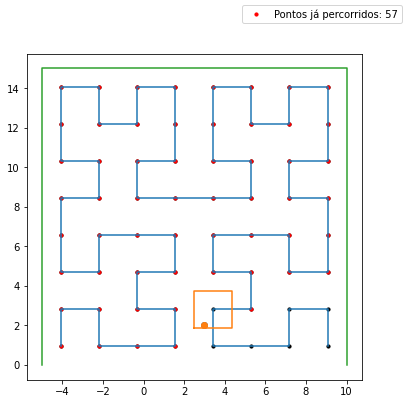

57

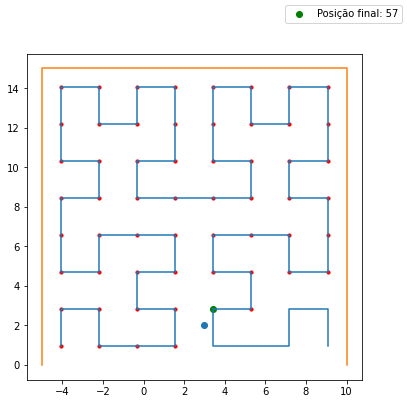

In [ ]:
#assert hsfc_get_point_pos_debug(points[0], order, frame) == 4
#assert hsfc_get_point_pos_debug(points[1], order, frame) == 16
#assert hsfc_get_point_pos_debug(points[2], order, frame) == 48
#assert hsfc_get_point_pos_debug(points[3], order, frame) == 49
hsfc_get_point_pos_debug(points[4], order, frame)

## Sorting points

In [ ]:
import math
def point_dist(p0, p1):
  delta_x = p0[0] - p1[0]
  delta_y = p0[1] - p1[1]
  return math.sqrt(delta_x ** 2 + delta_y ** 2)

def hsfc_sorted(points: List[PVector]) -> List[int]:
  """
  :param point: The set of points to be sorted with the Hilbert space filling curve
  :return: The indexes of the points from the list, sorted by the Hilbert curve
  """

  frame = gen_frame(points)
  min_dist = min([min([point_dist(points[p0], points[p1]) for p1 in range(len(points)) if p1 != p0]) for p0 in range(len(points))])
  squares = math.ceil((frame[0][1] - frame[0][0]) / min_dist) ** 2
  frame = gen_frame(points)
  order = math.ceil(math.log(squares, 2) - 1)
  out = list(range(len(points)))

  return sorted(out, key = lambda x : hsfc_get_point_pos(points[x], order, frame))

### Unit tests

#### Definitions

In [ ]:
points = np.array([[x[0] for x in g.coords_point()], [y[1] for y in g.coords_point()]])
order = hsfc_sorted(points)

#### Tests

AssertionError: ignored

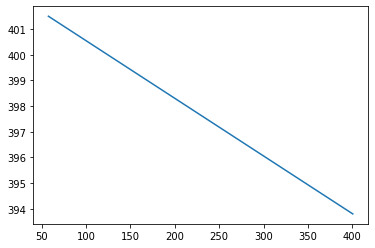

In [ ]:
plt.plot([points[0][idx] for idx in order], [points[1][idx] for idx in order])
assert order == [3, 2, 0, 4, 1, 7, 5, 6]

# Discovering the closest points between the groups, according to  hilbert's curve

### *Returns a list with the number of points of each group according to the index* 

In [ ]:
def group_points(grafo: Grafo) -> List[List[int]]:
  """
  :param grafo: The graph containing the points to be grouped
  :return: A list of lists containing the points of each group
  """

  array = []
  for i in kmeans.cluster_centers_: # Adiciona uma lista na lista, com a posição 0 recebendo o centroide.
    array.append([])

  j = 0
  for i in kmeans.labels_:
    array[i].append(j)
    j += 1
  
  return array

In [ ]:
group_points(g)

[[1, 4, 5, 6, 7], [0, 2, 3]]

#### Testes

In [ ]:
array_points = np.array(g.coords_point())

##### Analitico

In [ ]:
def labels():
  group = group_points(g)
  output = []

  for i in range(len(array_points)):
    for j in range(len(group)):
      if (i in group[j]):
        output.append(j)
        break
  return output

if (np.all(kmeans.labels_ == labels())):
  print('Passou')
else:
  print('Nao passou')

Passou


##### Visual

Segragacao de pontos segundo kmeans


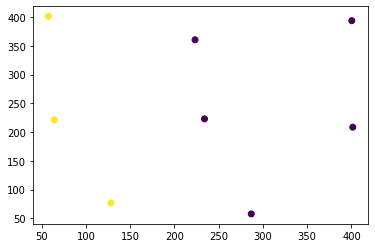

Segregacao de pontos


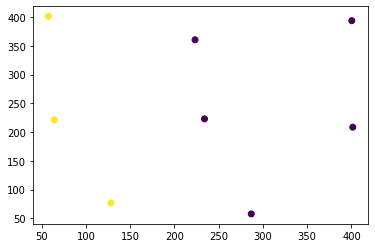

In [ ]:
print('Segragacao de pontos segundo kmeans')
plt.scatter(array_points[:, 0],
            array_points[:, 1],
            c = kmeans.labels_)
plt.show()

print('Segregacao de pontos')
plt.scatter(array_points[:, 0],
            array_points[:, 1],
            c = labels())
plt.show()

### *Closest point to the centroid, closest point to the centroid*

**eng**: Useless. Does the same number of camprisons as the "Closest point to the centroid, closest point" one, and it is less precise. It is ilogical.

**pt-br**: Inútil. Faz o mesmo número de comparações que a "Ponto mais próximo ao centróide, ponto mais próximo" e é menos precisa. Chega a ser até ilógica.

In [ ]:
def between_centroids(ordem: List[int],
                      Grafo: Grafo) -> List[List[int]]:
  """
  :param ordem: The order of passage through the groups
  :param grafo: The graph containing all the points
  :return: The index of each end of a group and the beggining of next
  """

  pontosDeConexao = []
  pontos_grupo = group_points(grafo)
  matriz = distance(grafo, centroid=True)

  for group in range(len(order)-1):
    # Impedindo que o ponto incial de um grupo seja igual ao último. last_point é gerada na parte 3.
    rearranjo_pontos = pontos_grupo[order[group]]
    if not group == 0:
      rearranjo_pontos.remove(last_point)

    # Encontra o ponto do grupo seguinte mais proximo ao centroide.
    vetor = matriz[-order[group+1]-1]
    distancia = -1

    for point in rearranjo_pontos:
      if vetor[point] < distancia or distancia == -1:
        distancia = vetor[point]
        pontos_conexao = point
    
    pontos_conexao = [pontos_conexao, None]

    # Encontra o ponto do grupo seguinte mais proximo ao centroide.
    vetor = matriz[-order[group]-1]
    distancia = -1

    for point in pontos_grupo[order[group+1]]:
      if vetor[point] < distancia or distancia == -1:
        distancia = vetor[point]
        pontos_conexao[1] = point
    
    last_point = pontos_conexao[1]

    pontosDeConexao.append(pontos_conexao)
  
  return pontosDeConexao

In [ ]:
between_centroids([0,1,2], g)

NameError: ignored

### *Closest point to the centroid, closest point*

**eng**: Both in this function and the next one have the option of adding the matrix with wights. If it isn't added, we use the cartesian distance matrix.

**pt-br**: Tanto nessa função quanto na proxima, "Força bruta: ponto próximo, ponto próximo", dá-se a opção de adicionar uma matriz com os pesos. Caso não seja adicionado, usaremos a matriz de distancias cartesianas.

In [ ]:
def conecting_centroid(ordem: List[int],
                       grafo: Grafo,
                       matriz: Optional[List[List[int]]]=None) -> List[List[int]]:
  """
  :param ordem: The order of passage through the groups
  :param grafo: The graph containing all the points
  :param matriz: Default None, Weights to consider instead of euclidian distance
  :return: The index of each end of a group and the beggining of next
  """

  pontos_proximos = []
  pontos_grupo = group_points(grafo)
  
  # Pode adicionar uma matriz com os pesos. Caso não acontecer, a função usará a matriz de distancias cartograficas.
  # You can add a weight matrix. If not, the fuction will use the cartesian distance matrix.
  if matriz==None:
    matriz = distance(grafo, centroid=True)

  for group in range(len(order)-1):
    
    # Impedindo que o ponto incial de um grupo seja igual ao último. last_point é gerada na parte 2.
    # Preventing the first point to be the same as the last one. last_point is created in part 2.
    rearranjo_pontos = pontos_grupo[order[group]]
    if not group == 0:
      rearranjo_pontos.remove(last_point)

    # Encontra o ponto do grupo seguinte mais proximo ao centroide.
    # Finds the next group's point that is closest to the centroid.
    vetor = matriz[-order[group]-1]
    distancia = -1

    for point in pontos_grupo[order[group+1]]:
      if vetor[point] < distancia or distancia == -1:
        distancia = vetor[point]
        pontos_conexao = point
    
    last_point = pontos_conexao
    pontos_conexao = [None, pontos_conexao]

    # Encontra o ponto mais próximo do ponto de conexão.
    # Finds the closest point to the conextion point.
    p_matriz = matriz[pontos_conexao[1]]
    distancia = -1

    for point in rearranjo_pontos:
      if p_matriz[point] < distancia or distancia == -1:
        distancia = p_matriz[point]
        pontos_conexao[0] = point
    
    pontos_proximos.append(pontos_conexao)
  
  return pontos_proximos     

In [ ]:
conecting_centroid([0,1,2], g)

### *Brute force: closest point, closest point*

In [ ]:
def conection_points(ordem: List[int],
                     grafo: Grafo,
                     matriz: Optional[List[List[int]]]=None) -> List[List[int]]:
  """
  :param ordem: The order of passage through the groups
  :param grafo: The graph containing all the points
  :param matriz: Default None, Weights to consider instead of euclidian distance
  :return: The index of each end of a group and the beggining of next
  """

  pontos_grupo = group_points(grafo)
  pontosDeConexao = []
  last_point = -1
  # Pode adicionar uma matriz com os pesos. Caso não acontecer, a função usará a
  # matriz de distancias cartograficas.
  # You can add a weight matrix. If not, the fuction will use the cartesian
  # distance matrix.
  if matriz==None:
    matriz = distance(grafo, verbose=False)
  
  for i in range(len(ordem)-1):
    distancia = -1

    for j in pontos_grupo[ordem[i]]:
      for k in pontos_grupo[ordem[i+1]]:
        if not j == last_point:
          if matriz[j][k] < distancia or distancia == -1:
            distancia = matriz[j][k]
            pontos = [j,k]
    
    last_point = pontos[1]
    pontosDeConexao.append(pontos)
  
  return pontosDeConexao    

In [ ]:
conection_points([0,1,2],g)

# Tests & Comparisons

In [ ]:
# Essa celula usa o grafo pronto
# This cell uses the ready-made graph.

g = Grafo('./dvTools/exemplo2.json')
array_points = np.array(g.coords_point())
kmeans = KMeans(n_clusters = 3).fit(array_points)

In [ ]:
# Essa celula usa um grafo aleatorio
# This cell uses a random graph.

n_points = 128

#g = dvTools_mod.Graph(data = genmesh(n_points))
array_points = np.array(g.coords_point())

def clusterization(array_points):
  kmeans = None
  POINTS_PER_CLUSTERS = 8 # 4 é um número levemente abaixo de 8, o número ideal de pontos por cluster 
                          # 4 is slightly lower than 8, the ideal cluster number
  k = math.ceil(len(array_points) / POINTS_PER_CLUSTERS)
  while True:
    kmeans = KMeans(n_clusters = k).fit(array_points)
    pointsperlabel = [ sum(kmeans.labels_ == label) for label in kmeans.labels_ ]
    if (max(pointsperlabel) <= 10): # Importante: o resultado só é válido quando um cluster não possui mais de 10 pontos.
                                    # IMPORTANT: the result is only valid if the cluster has less than 10 points.
    
      break
    k += 1 # Caso qualquer cluster tenha mais de 10 pontos adiciona 1 ao número de k clusters a serem gerados e repete o processo
            # If a cluster have more than 10 points, it adds 1 to the k number of clusters and repeats the process.
  return kmeans

kmeans = clusterization(array_points)

In [ ]:
order = hsfc_sorted(kmeans.cluster_centers_)

In [ ]:
def itop(graph, order, function): # Index to Points, mas com um nome mais radical e menos cafona 😎
  output = []
  for pair in function(order, graph):
    output.append([array_points[pair[0]],
                   array_points[pair[1]]])
  return output

In [ ]:
print(f'A ordem vai ser: {order}')

A ordem vai ser: [1, 0]


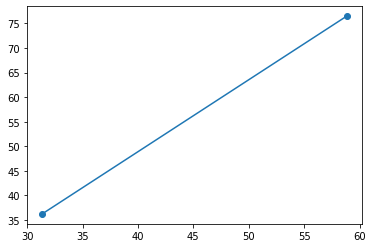

In [ ]:
centers = np.array([ kmeans.cluster_centers_[n] for n in order ])

plt.plot(centers[:, 0],
         centers[:, 1])
plt.scatter(centers[:, 0],
            centers[:, 1])

Label 1


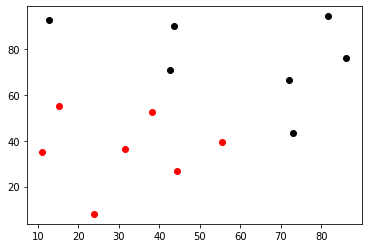

Label 0


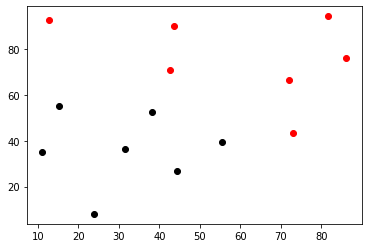

In [ ]:
for label in order:
  print(f'Label {label}')
  plt.scatter(array_points[ kmeans.labels_ == label, 0 ],
              array_points[ kmeans.labels_ == label, 1 ],
              c = 'r')
  plt.scatter(array_points[ kmeans.labels_ != label, 0 ],
              array_points[ kmeans.labels_ != label, 1 ],
              c = 'k')
  plt.show()

Calculando as distancias de todos os pontos entre si...
Custo inter-grupos: 18.969129216967236


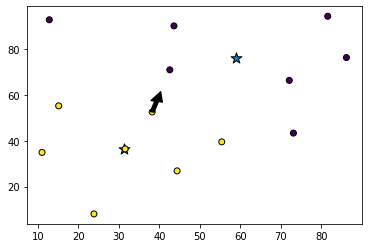

Calculando as distancias de todos os pontos entre si...
Custo inter-grupos: 18.969129216967236


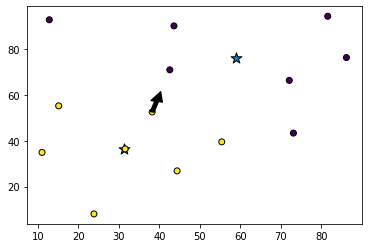

Custo inter-grupos: 18.105523038564776


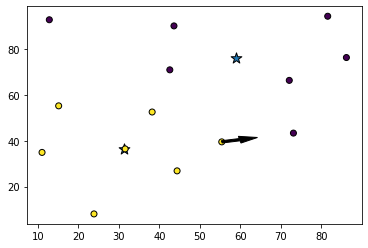

In [ ]:
for function in [between_centroids, conecting_centroid, conection_points]: # Python aceita uma funcao ser passada por parametro 🤔
  pairs = itop(g, order, function)
  cost = 0
  for pair in pairs:
    cost += math.sqrt( ((pair[0][0] - pair[1][0]) ** 2) +
                       ((pair[0][1] - pair[1][1]) ** 2) )

  print(f'Custo inter-grupos: {cost}')

  for pair in pairs:
    plt.arrow(pair[0][0],
              pair[0][1],
              (pair[1][0] - pair[0][0]) / 4,
              (pair[1][1] - pair[0][1]) / 4,
              width = 1,
              color = 'k')

  plt.scatter(kmeans.cluster_centers_[:, 0],
              kmeans.cluster_centers_[:, 1],
              marker = '*',
              edgecolor = 'black',
              s = 128)
    
  plt.scatter(array_points[:, 0],
              array_points[:, 1],
              edgecolor = 'k',
              c = kmeans.labels_)

  plt.show()

# Brute force inside the groups

In [ ]:
def dist(p0: PVector, p1: PVector) -> float:
  """
  :param p0: The point to take distance from
  :param p1: The point to take distance to
  :return: The euclidian distance from one point to another
  """

  dist_x = abs(p0[0] - p1[0])
  dist_y = abs(p0[1] - p1[1])
  return math.sqrt(dist_x ** 2 + dist_y ** 2)

def gen_mesh(n_points: int) -> Dict:
  """
  :param n_points: The number of points wished at the mesh
  :return: A randomly generated mesh
  """

  mesh = dict()
  for i in range(n_points):
    mesh[i] = {
        'coords': [random.randint(0, 1024), random.randint(0, 1024)],
        'edges': [ item + 1 if item >= i else item for item in range(n_points - 1) ],
        'weights': list()
    }
  for i in range(n_points):
    for j in range(n_points - 1):
      mesh[i]['weights'].append(dist(mesh[i]['coords'], mesh[j + 1 if j >= i else j]['coords']))
  
  return mesh

In [ ]:
import os

def dist(p0, p1):
  dist_x = abs(p0[0] - p1[0])
  dist_y = abs(p0[1] - p1[1])
  return math.sqrt(dist_x ** 2 + dist_y ** 2)

def gen_mesh(n_points: int, filename: str):
  try:
    os.remove(filename)
  except FileNotFoundError:
    pass
  mesh = dict()
  for i in range(n_points):
    mesh[i] = {
        'coords': [random.randint(0, 999999), random.randint(0, 999999)],
        'edges': [ item + 1 if item >= i else item for item in range(n_points - 1) ],
        'weights': list()
    }
  for i in range(n_points):
    for j in range(n_points - 1):
      mesh[i]['weights'].append(dist(mesh[i]['coords'], mesh[j + 1 if j >= i else j]['coords']))
  with open(filename, 'x') as f:
    f.write(json.dumps(mesh))

tests = list()
for p in range(13, 9999999):
  tests = list()
  for _ in range(10):
    gen_mesh(p, 'tmp.json')
    g = dvTools_mod.Graph(file='tmp.json')

    t0 = time.time()
    kmeans = clusterization(np.array(g.coords_point()))
    g_sub = dict()
    for label_idx in range(len(kmeans.labels_)):
      label = kmeans.labels_[label_idx]
      if label not in g_sub:
        g_sub[label] = dict()
      g_sub[label][label_idx] = g.data[label_idx]

    for key in g_sub:
      for point in g_sub[key]:
        to_del = list()
        for edge_idx in range(len(g_sub[key][point]['edges'])):
          if g_sub[key][point]['edges'][edge_idx] not in g_sub[key]:
            to_del.append(edge_idx)
        
        for edge_idx in to_del[::-1]:
          del g_sub[key][point]['edges'][edge_idx]
          del g_sub[key][point]['weights'][edge_idx]

    path = list()

    order = hsfc_sorted(kmeans.cluster_centers_)
    connections = conection_points(order, g)

    idx = 0
    for key in order:
      g_cur = dvTools_mod.Graph(data=g_sub[key])
      begin = connections[idx - 1][1] if idx != 0 else None
      end = connections[idx][0] if idx != len(order) - 1 else None
      path += dvTools_mod.Brute_force(g_cur,
                                    begin=begin,
                                    end=end).paths
      idx += 1
    
    time_hilbert = time.time() - t0
    #print(time_hilbert, path)
    tests.append(time_hilbert)
    continue
    #t0 = time.time()
    #c = dvTools_mod.Brute_force(g)
    #time_bf = time.time() - t0

    weight_hilbert = sum([g.weights[path[i]][path[i + 1]] for i in range(len(path) - 1)])
    weight_bf = sum([g.weights[c.paths[0][i]][c.paths[0][i + 1]] for i in range(len(path) - 1)])

    tests[-1].append((time_hilbert,time_bf, 100 * (weight_hilbert - weight_bf) / weight_bf))
  print(p, sum(tests) / len(tests))

In [ ]:
path

# Recicle bin

In [ ]:
# Encontra primeiro o mais próximo ao centróide e depois o mais proximo ao mais próximo ao centroide.

def between_centroids0(order, grafo):
  pontos_proximos = []
  pontos_grupo = group_points(grafo)
  coordenadas = g.coords_point()

  for group in range(len(order)-1):

    # Encontra o ponto do grupo seguinte
    distancia = -1
    
    for point in pontos_grupo[order[group+1]]:
      if distancia > distance_coords(kmeans.cluster_centers_[order[group]], coordenadas[point]) or distancia == -1:
        distancia = distance_coords(kmeans.cluster_centers_[order[group]], coordenadas[point])
        pontos_conexao = point
        
    pontos_conexao = [None,pontos_conexao]

    # Encontra o ponto mais próximo do ponto de conexão.
    distancia = -1

    for point in pontos_grupo[order[group]]:
      if distancia > distance_coords(kmeans.cluster_centers_[order[group]], coordenadas[point]) or distancia == -1:
        distancia = distance_coords(kmeans.cluster_centers_[order[group]], coordenadas[point])
        pontos_conexao[0] = point
    
    pontos_proximos.append(pontos_conexao)
  
  return pontos_proximos     

In [ ]:
between_centroids0([0,1,2], g)

[[6, 5], [5, 2]]

In [ ]:
def entre_grupos(ordem, grafo):
  pontos_grupo = group_points(grafo)
  coordenadas = g.coords_point()
  pontosDeConexao = []
  
  for i in range(len(ordem)-1):
    distancia = -1

    for j in pontos_grupo[ordem[i]]:
      for k in pontos_grupo[ordem[i+1]]:
        if distance_coords(coordenadas[j], coordenadas[k]) < distancia or distancia == -1:
          distancia = distance_coords(coordenadas[j], coordenadas[k])
          pontos = [j,k]
        
    pontosDeConexao.append(pontos)
  
  return pontosDeConexao    

In [ ]:
entre_grupos([0,1,2], g)

[[4, 5], [2, 3]]